**Lampiran Implementasi DBSCAN Clustering dengan Bahasa Pemrograman Python** <br>
Nama : Muhammad Nadhif Athalla <br>
NIM : 119140209 <br>
Kelas : Pembelajaran Mesin R <br>
Subject : Tugas Minggu 11 - Implementasi Dua Pendekatan Clustering 

In [ ]:
# kneed library instalation
!pip install --upgrade kneed

In [ ]:
# importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# read dataset
df = pd.read_csv("Minggu 11 - Dataset.csv")

In [ ]:
# lookup the dataset head
df.head()

,DATASET,X1,X2
0,1,3,5
1,2,5,8
2,3,18,18
3,4,11,10
4,5,16,17


In [ ]:
# lookup the dataset shape
df.shape

(20, 3)

In [ ]:
# get only the features needed
df = df.iloc[:, [1,2]].values
df

array([[ 3,  5],
       [ 5,  8],
       [18, 18],
       [11, 10],
       [16, 17],
       [ 3, 18],
       [ 4, 20],
       [ 6,  7],
       [ 5, 11],
       [ 1, 18],
       [17, 18],
       [16, 20],
       [ 5, 18],
       [ 7,  4],
       [13, 12],
       [ 3, 16],
       [18, 20],
       [15, 15],
       [ 6, 10],
       [ 8,  5]])

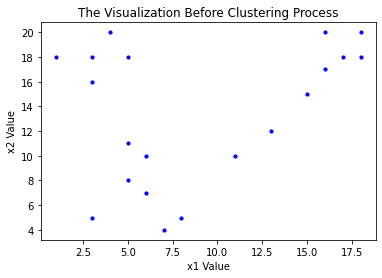

In [ ]:
# plot the dataset before clustering
plt.scatter(df[:,0], df[:,1], s=10, c="blue")

plt.title("The Visualization Before Clustering Process")
plt.xlabel("x1 Value")
plt.ylabel("x2 Value")
plt.show()

In [ ]:
# pre-processing data with MinMaxScaler (not done)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dfx1 = df[:,0].reshape(-1,1)
dfx2 = df[:,1].reshape(-1,1)
scaler.fit(dfx1)
dfx1 = scaler.transform(dfx1)

scaler.fit(dfx2)
dfx2 = scaler.transform(dfx2)

In [ ]:
# count nearest neighbors
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(df)
distances, indices = neighbors_fit.kneighbors(df)

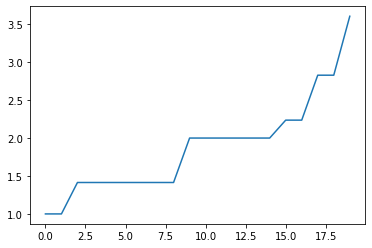

In [ ]:
# visualize nearest neighbors
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

Nilai Optimum Epsilon Adalah 2.23606797749979


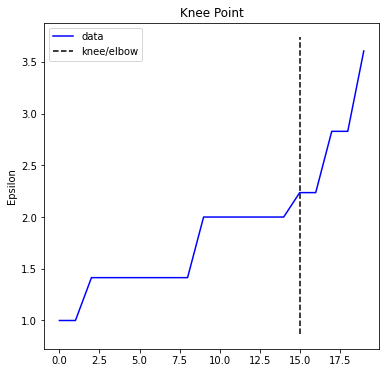

In [ ]:
# Elbow Point
from kneed import KneeLocator
x = np.arange(len(distances))
epsilon = KneeLocator(x, distances, curve='convex', direction='increasing', interp_method='polynomial')

# Visualization
epsilon.plot_knee()
plt.ylabel("Epsilon")
print("Nilai Optimum Epsilon Adalah", distances[epsilon.knee])

In [ ]:
# inisiasi epsilon dan minPTS value
epsilon = 2.23606797749979
minPTS = 2

In [ ]:
# importing DBSCAN cluster library, then create models with eps and minPTS value
from sklearn.cluster import DBSCAN
models = DBSCAN(eps=epsilon, min_samples=minPTS)

In [ ]:
# fitting the models
clusters = models.fit_predict(df)

In [ ]:
# lookup how much cluster with those models
theClusters = np.unique(clusters)
total_clusters = len(theClusters)

print(f"There are {total_clusters:,} number of clusters")
print("The clusters are", theClusters)

There are 5 number of clusters
The clusters are [-1  0  1  2  3]


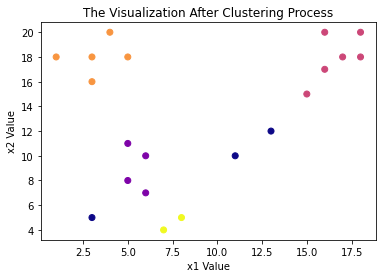

In [ ]:
# plot the result after clustering process
plt.scatter(df[:,0], df[:,1], c = clusters, cmap="plasma")

plt.title("The Visualization After Clustering Process")
plt.xlabel("x1 Value")
plt.ylabel("x2 Value")
plt.show()

In [ ]:
# count the accuracy
from sklearn.metrics import silhouette_score
result = silhouette_score(df, clusters)
print("Silhouette Score Value is", result)

Silhouette Score Value is 0.5217415338469868
